***Import the Libraries***

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


***Read in the data***

In [4]:
df = pd.read_csv('../Dataset/movies.csv')
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [3]:
# Let's look at the data
df.head(10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1       July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2      June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3       July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4      July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5        May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6      June 20, 1980 (United States)    7.9   188000.0         John Landis   
7  December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8      June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9       May 16, 1980 (United States)    7.0    10000.0         Walter Hill   

                    writer             star         country      budget  \
0             Stephen King   Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole   Brooke Shields   United States   4500000.0   
2           Leigh Brackett      Mark Hamill   United States  18000000.0   
3             Jim Abrahams      Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray      Chevy Chase   United States   6000000.0   
5            Victor Miller     Betsy Palmer   United States    550000.0   
6              Dan Aykroyd     John Belushi   United States  27000000.0   
7             Jake LaMotta   Robert De Niro   United States  18000000.0   
8             Jerry Siegel     Gene Hackman   United States  54000000.0   
9              Bill Bryden  David Carradine   United States  10000000.0   

         gross                       company  runtime  
0   46998772.0                  Warner Bros.    146.0  
1   58853106.0             Columbia Pictures    104.0  
2  538375067.0                     Lucasfilm    124.0  
3   83453539.0            Paramount Pictures     88.0  
4   39846344.0                Orion Pictures     98.0  
5   39754601.0            Paramount Pictures     95.0  
6  115229890.0            Universal Pictures    133.0  
7   23402427.0  Chartoff-Winkler Productions    129.0  
8  108185706.0                Dovemead Films    127.0  
9   15795189.0                United Artists    100.0

In [6]:
# Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df.rename(columns = {'name':'Name', 'rating':'Rating', 'genre':'Genre', 'year':'Year', 'released':'Released', 'score':'Score', 'votes':'Votes',
       'director':'Director', 'writer':'Writer', 'star':'Star', 'country':'Country', 'budget':'Budget', 'gross':'Gross', 'company':'Company',
       'runtime':'Runtime'}, inplace = True)

In [9]:
df['Budget'] = df['Budget'].astype('int64', errors='ignore')
df['Gross'] = df['Gross'].astype('int64',errors='ignore')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7668 non-null   object 
 1   Rating    7591 non-null   object 
 2   Genre     7668 non-null   object 
 3   Year      7668 non-null   int64  
 4   Released  7666 non-null   object 
 5   Score     7665 non-null   float64
 6   Votes     7665 non-null   float64
 7   Director  7668 non-null   object 
 8   Writer    7665 non-null   object 
 9   Star      7667 non-null   object 
 10  Country   7665 non-null   object 
 11  Budget    5497 non-null   float64
 12  Gross     7479 non-null   float64
 13  Company   7651 non-null   object 
 14  Runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [11]:
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [12]:
df['YearCorrect'] = df['Released'].astype(str).str[:4]
df

Name Rating      Genre  Year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              Released  Score      Votes         Director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       Writer              Star         Country      Budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            Gross                    Company  Runtime YearCorrect  
0      46998772.0               Warner Bros.    146.0        June  
1      58853106.0          Columbia Pictures    104.0        July  
2     538375067.0                  Lucasfilm    124.0        June  
3      83453539.0         Paramount Pictures     88.0        July  
4      39846344.0             Orion Pictures     98.0        July  
...           ...                        ...      ...         ...  
7663          NaN                        NaN     90.0        Octo  
7664          NaN  Cactus Blue Entertainment     90.0        Febr  
7665          NaN           Embi Productions      NaN        Apri  
7666          NaN                        NaN    120.0        Octo  
7667          NaN                PK 65 Films    102.0        Augu  

[7668 rows x 16 columns]

In [13]:
df.sort_values(by=['Gross'], inplace=False, ascending=False)

Name Rating   Genre  Year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life    NaN   Drama  2020   
7664                                 Dream Round    NaN  Comedy  2020   
7665                               Saving Mbango    NaN   Drama  2020   
7666                                It's Just Us    NaN   Drama  2020   
7667                                   Tee em el    NaN  Horror  2020   

                               Released  Score      Votes       Director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   
...                                 ...    ...        ...            ...   
7663   October 23, 2020 (United States)    3.1       18.0  Joseph Ebanks   
7664   February 7, 2020 (United States)    4.7       36.0   Dusty Dukatz   
7665          April 27, 2020 (Cameroon)    5.7       29.0   Nkanya Nkwai   
7666    October 1, 2020 (United States)    NaN        NaN  James Randall   
7667    August 19, 2020 (United States)    5.7        7.0   Pereko Mosia   

                  Writer               Star        Country       Budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
...                  ...                ...            ...          ...   
7663       Joseph Ebanks       Shannon Bond  United States       7000.0   
7664         Lisa Huston   Michael Saquella  United States          NaN   
7665        Lynno Lovert       Onyama Laura  United States      58750.0   
7666       James Randall      Christina Roz  United States      15000.0   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa          NaN   

             Gross                    Company  Runtime YearCorrect  
5445  2.847246e+09      Twentieth Century Fox    162.0        Dece  
7445  2.797501e+09             Marvel Studios    181.0        Apri  
3045  2.201647e+09      Twentieth Century Fox    194.0        Dece  
6663  2.069522e+09                  Lucasfilm    138.0        Dece  
7244  2.048360e+09             Marvel Studios    149.0        Apri  
...            ...                        ...      ...         ...  
7663           NaN                        NaN     90.0        Octo  
7664           NaN  Cactus Blue Entertainment     90.0        Febr  
7665           NaN           Embi Productions      NaN        Apri  
7666           NaN                        NaN    120.0        Octo  
7667           NaN                PK 65 Films    102.0        Augu  

[7668 rows x 16 columns]

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
# Drop any duplicates
df['Company'] = df['Company'].drop_duplicates().sort_values(ascending=False)

In [ ]:
# Budget high correlation
# Company high correlation

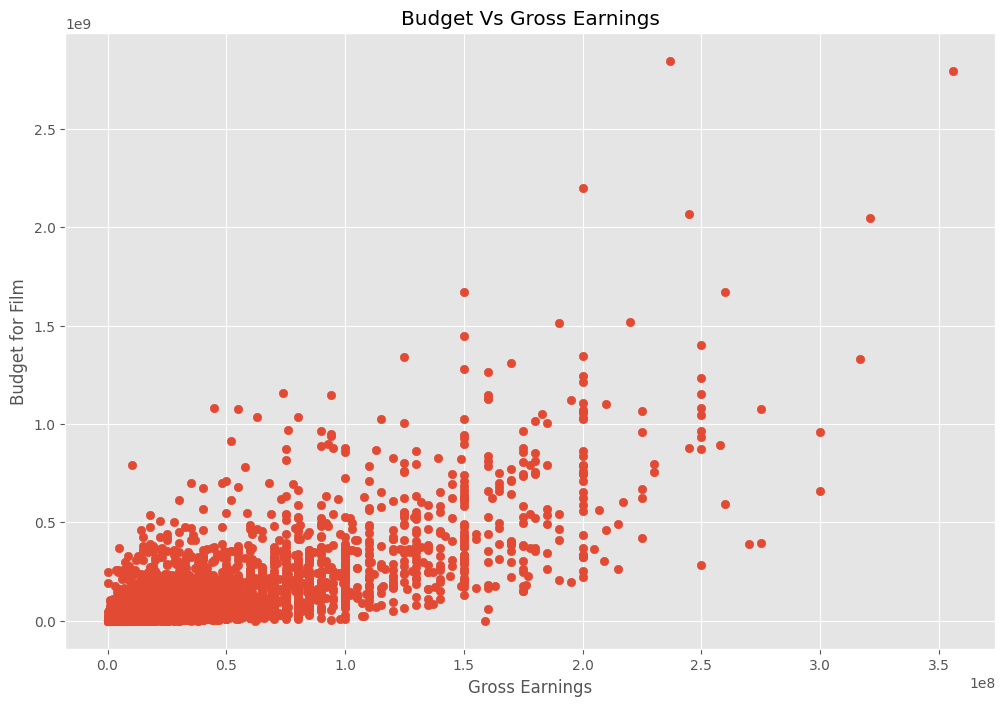

In [16]:
# Scatter plot with budget vs gross
plt.scatter(x=df['Budget'], y=df['Gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='Budget', ylabel='Gross'>

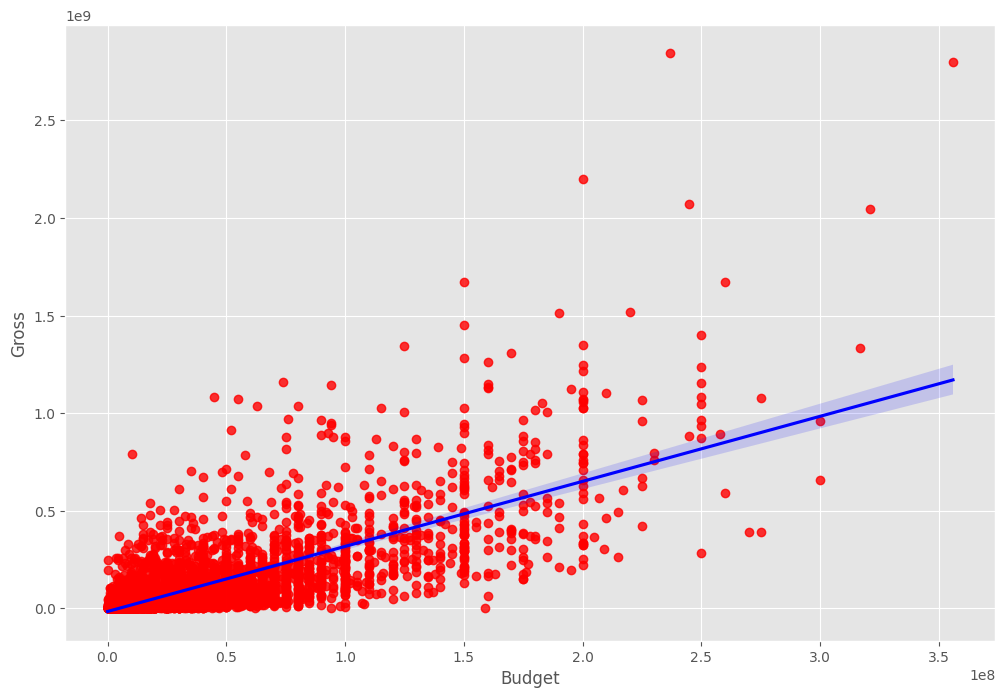

In [17]:
# Plot budget vs gross using seaborn
sns.regplot(x='Budget', y='Gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [18]:
df.corr(method='pearson', numeric_only=True) #pearson, kendall, spearman

Year     Score     Votes    Budget     Gross   Runtime
Year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
Score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
Votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
Budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
Gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
Runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

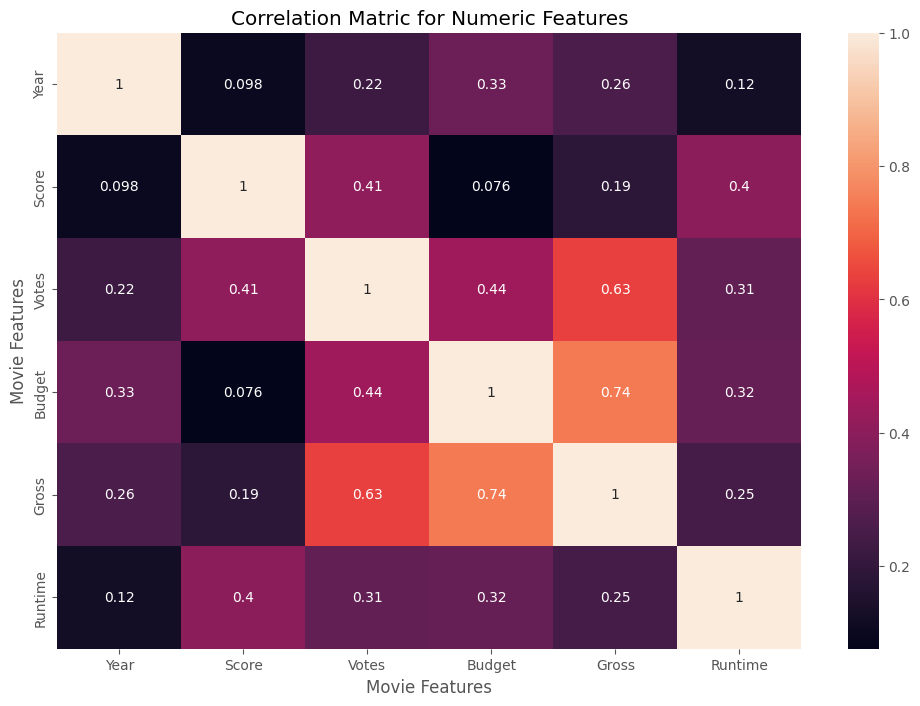

In [19]:
#High correlation between budget and gross
correlation_matrix = df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [20]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

Name  Rating  Genre  Year  Released  Score      Votes  Director  Writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

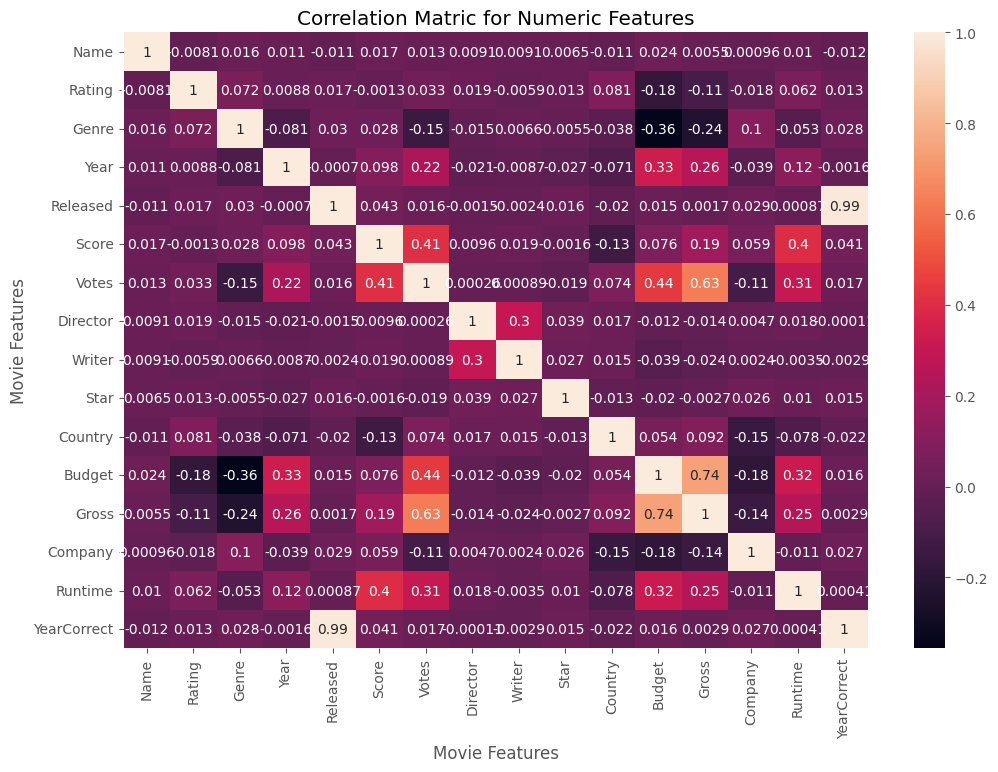

In [21]:
correlation_matrix = df_numerized.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
df_numerized.corr()

Name    Rating     Genre      Year  Released     Score  \
Name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
Rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
Genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
Year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
Released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
Score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
Votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
Director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
Writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
Star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
Country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
Budget       0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
Gross        0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
Company      0.000961 -0.018387  0.099779 -0.038516  0.028690  0.059243   
Runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
YearCorrect -0.011725  0.013475  0.028397 -0.001562  0.993694  0.040993   

                Votes  Director    Writer      Star   Country    Budget  \
Name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
Rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
Genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
Year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
Released     0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
Score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
Votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
Director     0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
Writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
Star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
Country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
Budget       0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
Gross        0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
Company     -0.109982  0.004740  0.002383  0.025543 -0.150228 -0.182844   
Runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   
YearCorrect  0.017337 -0.000105 -0.002892  0.015406 -0.022277  0.015682   

                Gross   Company   Runtime  YearCorrect  
Name         0.005533  0.000961  0.010392    -0.011725  
Rating      -0.107339 -0.018387  0.062145     0.013475  
Genre       -0.235650  0.099779 -0.052711     0.028397  
Year         0.257486 -0.038516  0.120811    -0.001562  
Released     0.001659  0.028690  0.000868     0.993694  
Score        0.186258  0.059243  0.399451     0.040993  
Votes        0.630757 -0.109982  0.309212     0.017337  
Director    -0.014441  0.004740  0.017624    -0.000105  
Writer      -0.023519  0.002383 -0.003511    -0.002892  
Star        -0.002717  0.025543  0.010174     0.015406  
Country      0.092129 -0.150228 -0.078412    -0.022277  
Budget       0.740395 -0.182844  0.320447     0.015682  
Gross        1.000000 -0.144737  0.245216     0.002946  
Company     -0.144737  1.000000 -0.010533     0.027227  
Runtime      0.245216 -0.010533  1.000000     0.000410  
YearCorrect  0.002946  0.027227  0.000410     1.000000

In [23]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Name         Name           1.000000
             Rating        -0.008069
             Genre          0.016355
             Year           0.011453
             Released      -0.011311
             Score          0.017097
             Votes          0.013088
             Director       0.009079
             Writer         0.009081
             Star           0.006472
             Country       -0.010737
             Budget         0.023970
             Gross          0.005533
             Company        0.000961
             Runtime        0.010392
             YearCorrect   -0.011725
Rating       Name          -0.008069
             Rating         1.000000
             Genre          0.072423
             Year           0.008779
             Released       0.016613
             Score         -0.001314
             Votes          0.033225
             Director       0.019483
             Writer        -0.005921
             Star           0.013405
             Country        0.081244
 

In [24]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Budget       Genre         -0.356564
Genre        Budget        -0.356564
Gross        Genre         -0.235650
Genre        Gross         -0.235650
Budget       Company       -0.182844
Company      Budget        -0.182844
Budget       Rating        -0.176002
Rating       Budget        -0.176002
Country      Company       -0.150228
Company      Country       -0.150228
Genre        Votes         -0.145307
Votes        Genre         -0.145307
Gross        Company       -0.144737
Company      Gross         -0.144737
Country      Score         -0.133348
Score        Country       -0.133348
Votes        Company       -0.109982
Company      Votes         -0.109982
Rating       Gross         -0.107339
Gross        Rating        -0.107339
Year         Genre         -0.081261
Genre        Year          -0.081261
Country      Runtime       -0.078412
Runtime      Country       -0.078412
Country      Year          -0.070938
Year         Country       -0.070938
Genre        Runtime       -0.052711
R

In [25]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

Gross        Votes          0.630757
Votes        Gross          0.630757
Budget       Gross          0.740395
Gross        Budget         0.740395
YearCorrect  Released       0.993694
Released     YearCorrect    0.993694
Name         Name           1.000000
Company      Company        1.000000
Gross        Gross          1.000000
Budget       Budget         1.000000
Country      Country        1.000000
Star         Star           1.000000
Writer       Writer         1.000000
Director     Director       1.000000
Votes        Votes          1.000000
Score        Score          1.000000
Released     Released       1.000000
Year         Year           1.000000
Genre        Genre          1.000000
Rating       Rating         1.000000
Runtime      Runtime        1.000000
YearCorrect  YearCorrect    1.000000
dtype: float64